# Clustering Example with Sklearn

In [1]:
import numpy as np
np.random.seed(0)
import pandas as pd

# datasets
from sklearn.datasets import make_blobs, make_biclusters, make_circles

# plotting
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# clustering algorithms and metrics
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Generate Data

In [2]:
# Four blob clusters
data = make_blobs(n_samples=500, n_features=2, centers=5, random_state=32)
X = data[0]
y = data[1]
df_blobs = pd.DataFrame({'x1': X[:,0], 'x2':10*X[:,1], 'y': y}) # scale one feature with factor 10

In [3]:
# Two circular clusters
data = make_circles(n_samples=1500, noise=0.05, random_state=170, factor=0.5)
X = data[0]
y = data[1]
df_circles = pd.DataFrame({'x1': X[:,0], 'x2':X[:,1], 'y': y})

## Summary Statistics

In [4]:
df_blobs.groupby('y').describe()

x1                                                              \
   count      mean       std       min       25%       50%       75%   
y                                                                      
0  100.0  7.333075  1.122221  4.809290  6.579835  7.290385  8.188467   
1  100.0  0.975390  1.010938 -1.268506  0.203026  1.009893  1.605088   
2  100.0  4.625332  1.009176  1.914981  3.867173  4.573438  5.372191   
3  100.0 -7.943824  0.846626 -9.694036 -8.495488 -7.879567 -7.446445   
4  100.0  2.240840  0.849674 -0.560114  1.698324  2.244696  2.717577   

                 x2                                                         \
         max  count       mean        std        min        25%        50%   
y                                                                            
0  10.541498  100.0 -25.435478   9.061458 -49.245206 -30.894208 -25.507165   
1   3.147080  100.0  90.344332  10.101041  67.686967  83.690281  90.443463   
2   6.856548  100.0  65.847355   9.478688  39.306315  58.898427  67.925456   
3  -6.007346  100.0  87.359250  10.611645  54.497213  80.097897  87.504386   
4   3.948838  100.0  18.372897   9.769014  -6.110042  10.328087  18.985867   

                          
         75%         max  
y                         
0 -20.094088   -6.053534  
1  96.053987  120.096904  
2  72.613250   90.279309  
3  94.996129  109.436331  
4  25.556958   46.643477

In [5]:
df_circles.groupby('y').describe()

x1                                                              \
   count      mean       std       min       25%       50%       75%   
y                                                                      
0  750.0 -0.001063  0.708014 -1.073246 -0.712942 -0.000268  0.709146   
1  750.0  0.000254  0.358520 -0.665414 -0.353342  0.007178  0.349227   

                x2                                                    \
        max  count      mean       std       min       25%       50%   
y                                                                      
0  1.070363  750.0 -0.002828  0.708527 -1.089297 -0.721016 -0.006876   
1  0.606642  750.0 -0.003420  0.354976 -0.638923 -0.353999  0.000177   

                       
        75%       max  
y                      
0  0.697816  1.108384  
1  0.348844  0.590549

## Plot Data

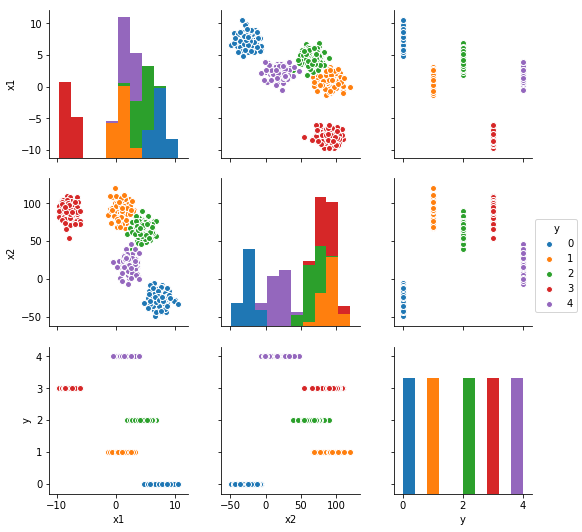

In [6]:
# blobs
sns.pairplot(data=df_blobs, hue='y')

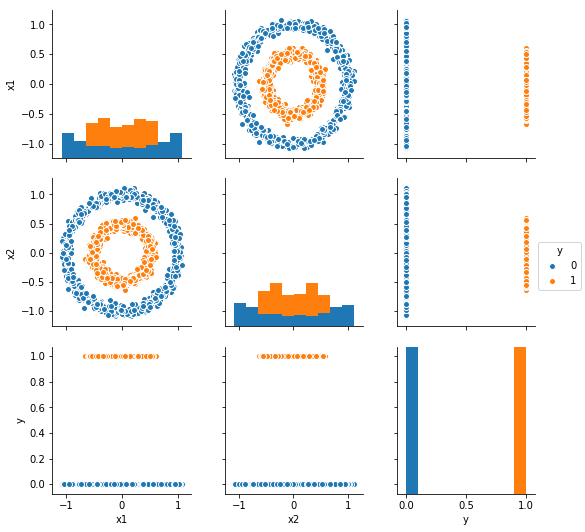

In [7]:
# circular
sns.pairplot(data=df_circles, hue='y')

## Fit Blob Data with k means and DBSCAN

### KMeans

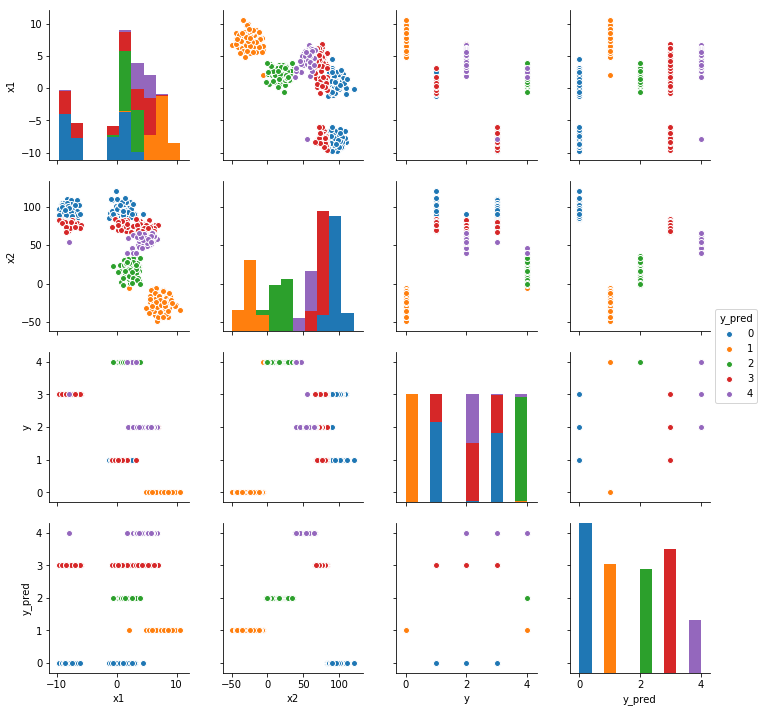

In [8]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df_blobs.drop('y', axis=1))
y_pred = kmeans.predict(df_blobs.drop('y', axis=1))
df_blobs['y_pred'] = y_pred
sns.pairplot(df_blobs, hue='y_pred')

## Cluster Centers and Different Scales

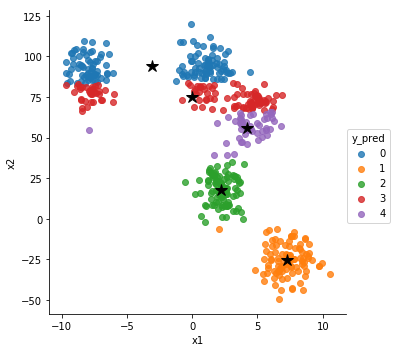

In [48]:
g = sns.lmplot(data=df_blobs, x='x1', y='x2', fit_reg=False, hue='y_pred')
axes = g.axes[0][0]
#axes.set_xlim(-60,125)
#axes.set_ylim(-60,125)
x1 = kmeans.cluster_centers_[:,0]
x2 = kmeans.cluster_centers_[:,1]
axes.plot(x1,x2, 'k*', markersize=12)
g

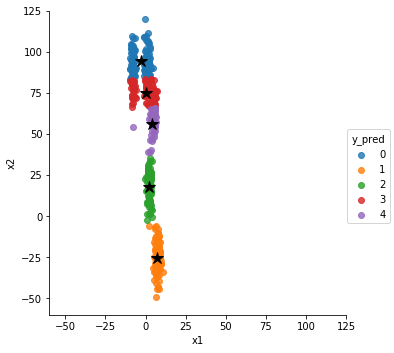

In [49]:
g = sns.lmplot(data=df_blobs, x='x1', y='x2', fit_reg=False, hue='y_pred')
axes = g.axes[0][0]
axes.set_xlim(-60,125)
axes.set_ylim(-60,125)
x1 = kmeans.cluster_centers_[:,0]
x2 = kmeans.cluster_centers_[:,1]
axes.plot(x1,x2, 'k*', markersize=12)
g

### Scale Data

In [51]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_blobs[['x1', 'x2']])
x1_scaled = X_scaled[:,0]
x2_scaled = X_scaled[:,1]
df_blobs['x1_scaled'] = x1_scaled
df_blobs['x2_scaled'] = x2_scaled

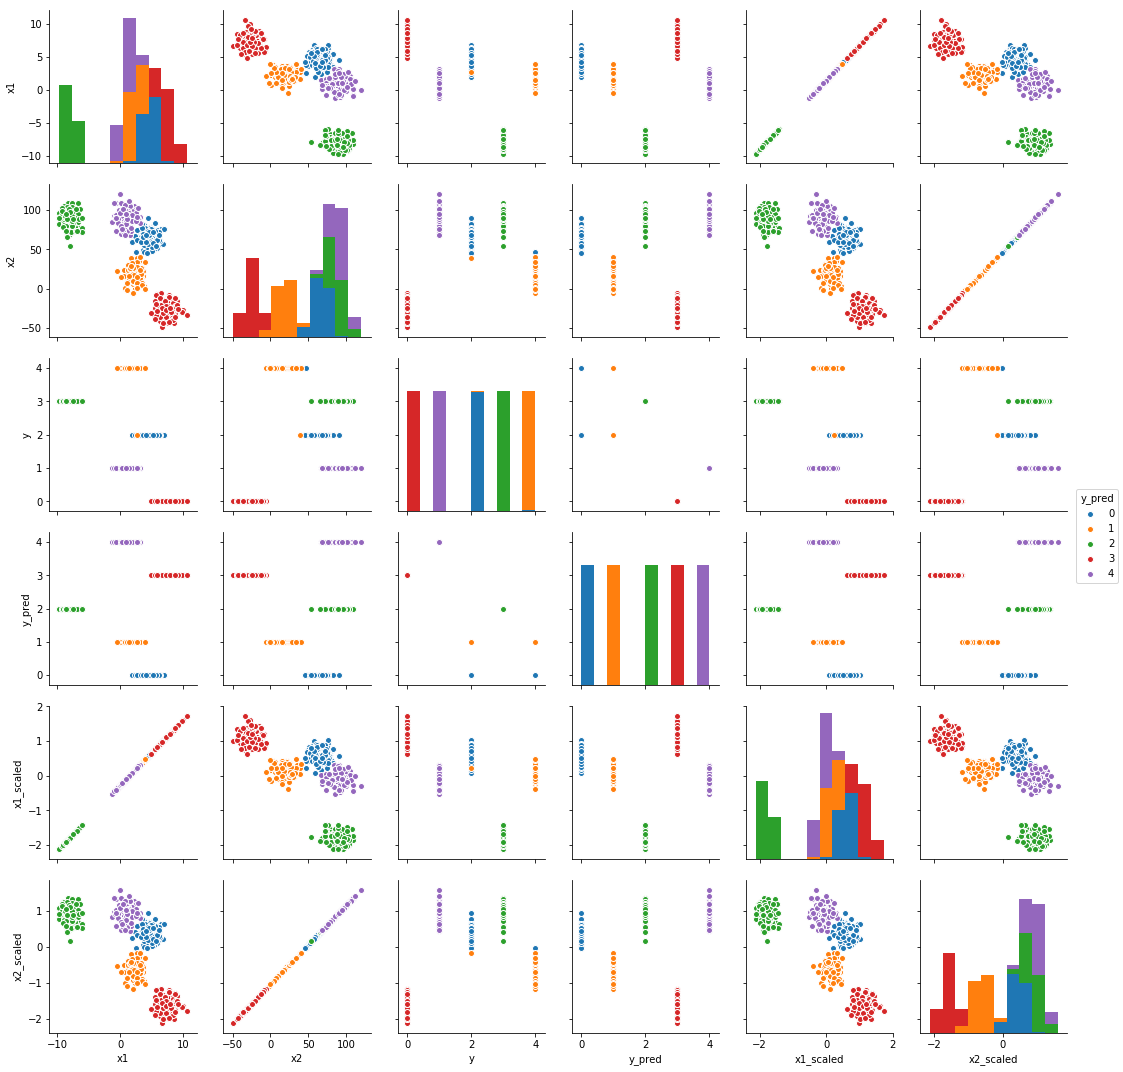

In [52]:
kmeans.fit(df_blobs[['x1_scaled', 'x2_scaled']])
y_pred = kmeans.predict(df_blobs[['x1_scaled', 'x2_scaled']])
df_blobs['y_pred'] = y_pred
sns.pairplot(df_blobs, hue='y_pred')

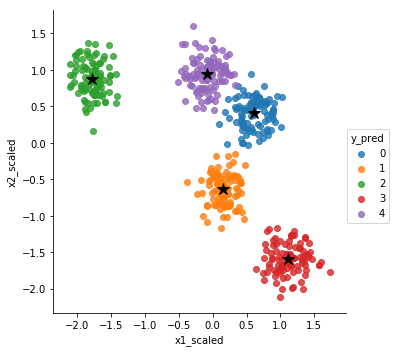

In [54]:
g = sns.lmplot(data=df_blobs, x='x1_scaled', y='x2_scaled', fit_reg=False, hue='y_pred')
axes = g.axes[0][0]
#axes.set_xlim(-60,125)
#axes.set_ylim(-60,125)
x1 = kmeans.cluster_centers_[:,0]
x2 = kmeans.cluster_centers_[:,1]
axes.plot(x1,x2, 'k*', markersize=12)
g

### Determine best number of clusters

!['elbow'](elbow.png)
Source: https://bl.ocks.org/rpgove/0060ff3b656618e9136b

In [59]:
# elbow
from scipy.spatial.distance import cdist # Compute distance between each pair of the two collections of inputs.
distortions = []
K = range(1,10)
X = df_blobs[['x1_scaled', 'x2_scaled']]
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    # average distance inside a cluster (min)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

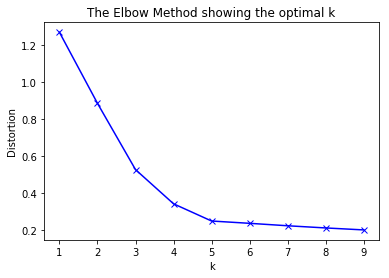

In [60]:
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [20]:
eukl_score = []
eukl_clusters = []
for n_clusters in range(2,10):
    kmeans = KMeans(n_clusters=n_clusters)
    df_blobs['y_pred'] = kmeans.fit_predict(df_blobs[['x1_scaled', 'x2_scaled']])
    score = silhouette_score(df_blobs[['x1_scaled', 'x2_scaled']], df_blobs['y_pred'])
    eukl_score.append(score)
    eukl_clusters.append(n_clusters)

Text(0,0.5,'silhouette score')

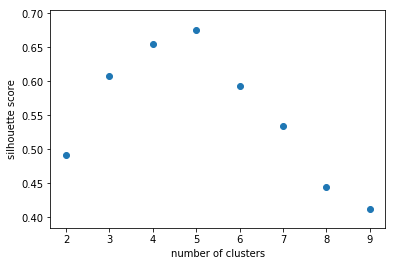

In [26]:
plt.scatter(eukl_clusters, eukl_score)
plt.xlabel('number of clusters')
plt.ylabel('silhouette score')

### DBScan with scaled data

In [27]:
dbscan = DBSCAN()
y_pred = dbscan.fit_predict(df_blobs[['x1_scaled', 'x2_scaled']])
df_blobs['y_pred'] = y_pred

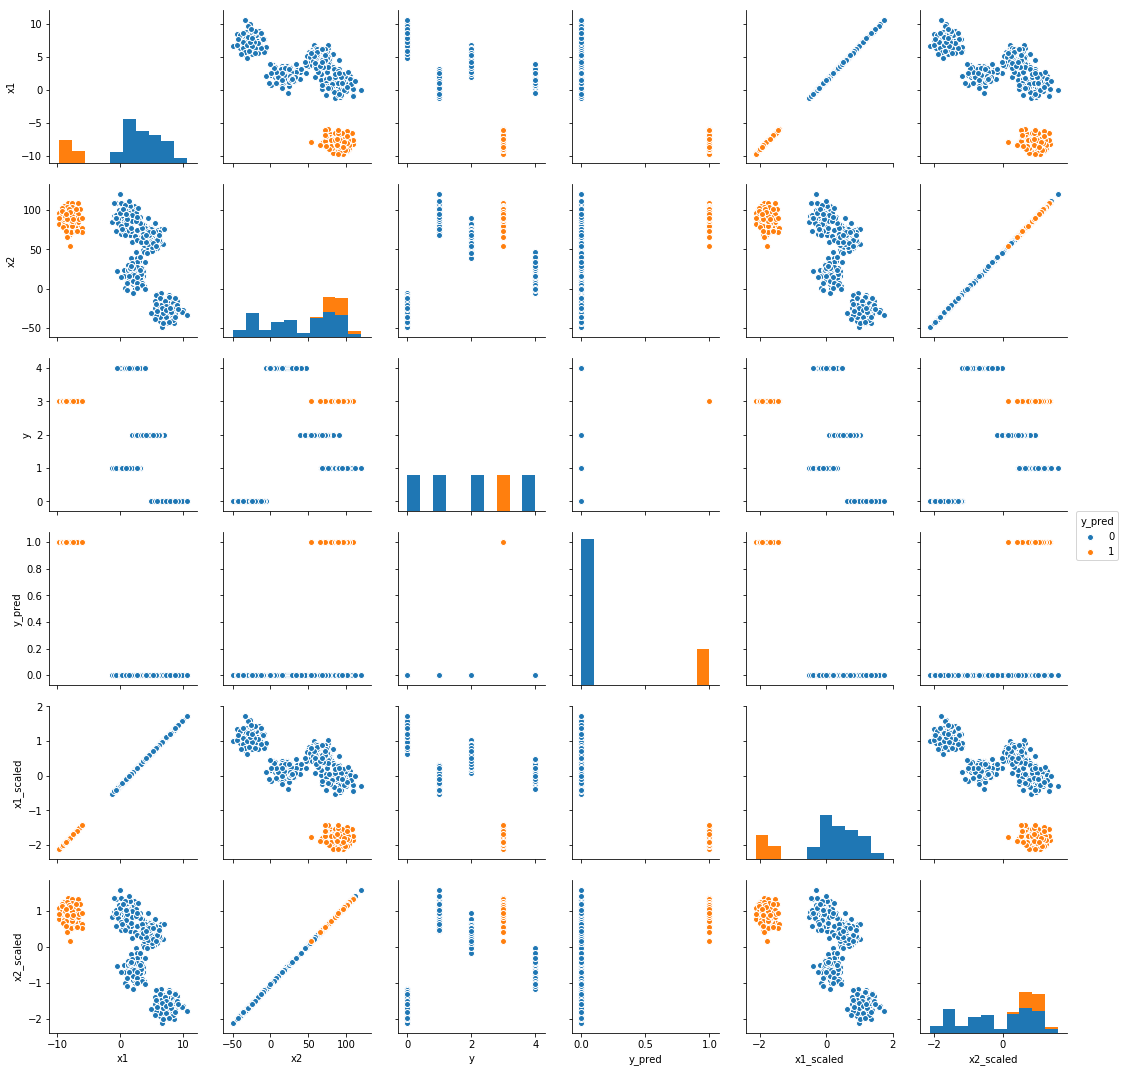

In [28]:
sns.pairplot(df_blobs, hue='y_pred')

### Find optimal eps

In [29]:
db_score = []
db_eps = []
for epsilon in np.arange(0.1,1, 0.1):
    dbscan = DBSCAN(eps=epsilon)
    df_blobs['y_pred'] = dbscan.fit_predict(df_blobs[['x1_scaled', 'x2_scaled']])
    score = silhouette_score(df_blobs[['x1_scaled', 'x2_scaled']], df_blobs['y_pred'])
    db_score.append(score)
    db_eps.append(epsilon)

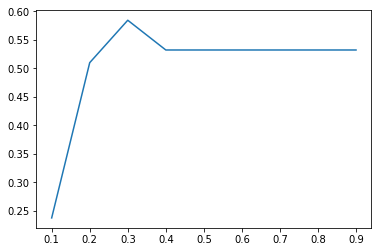

In [30]:
plt.plot(db_eps, db_score)

In [31]:
dbscan = DBSCAN(eps=0.3)
y_pred = dbscan.fit_predict(df_blobs[['x1_scaled', 'x2_scaled']])
df_blobs['y_pred'] = y_pred

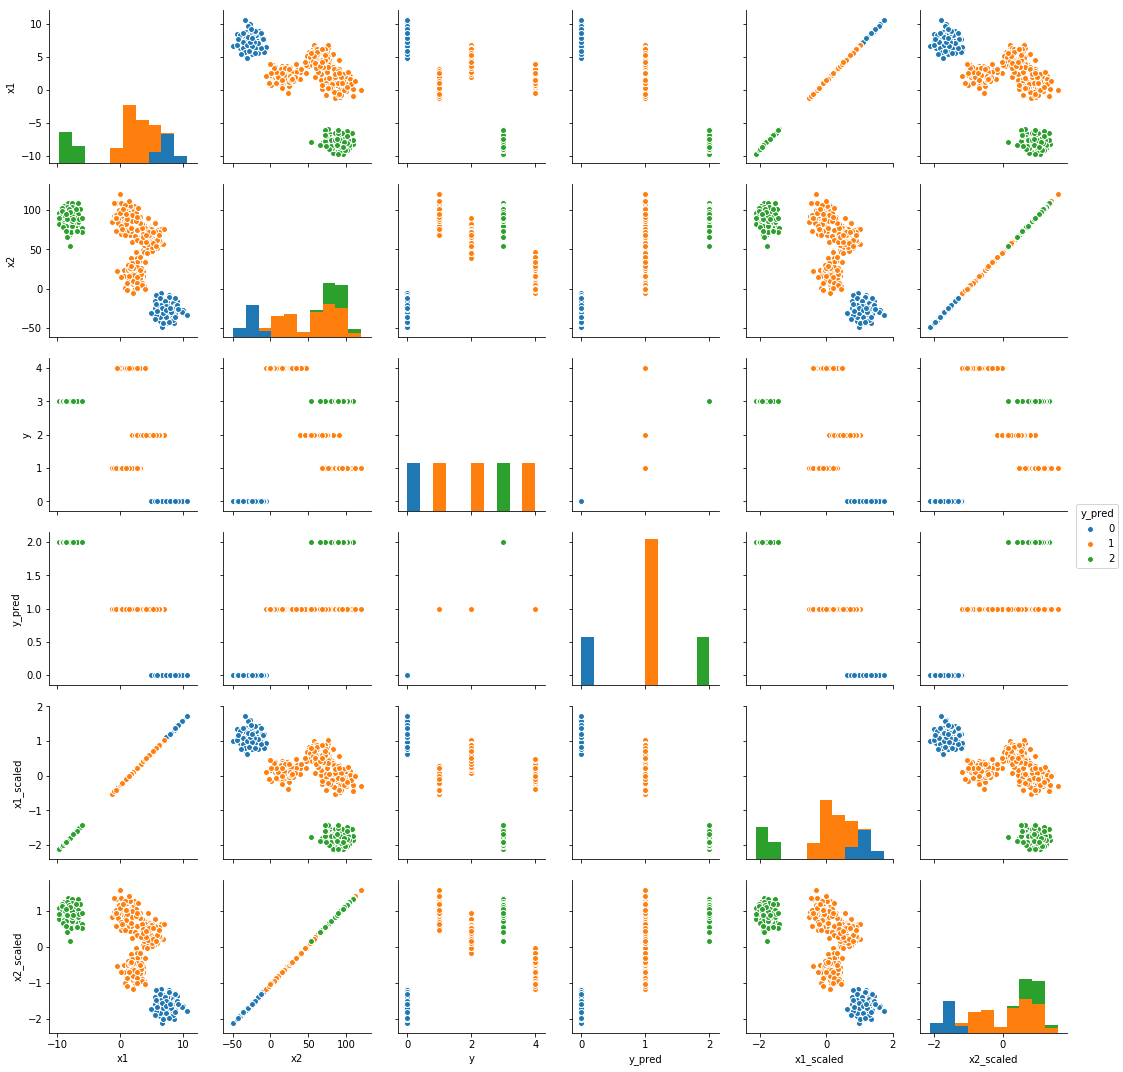

In [32]:
sns.pairplot(df_blobs, hue='y_pred')

## Fit Circular Data with k means and DBSCAN

### KMeans

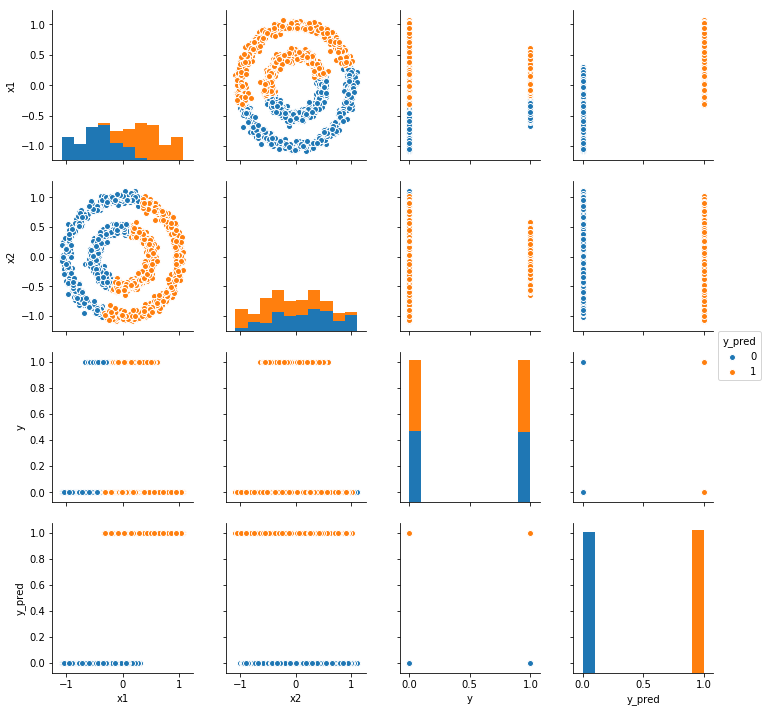

In [34]:
kmeans = KMeans(n_clusters=2)
df_circles['y_pred'] = kmeans.fit_predict(df_circles.drop('y', axis=1))
sns.pairplot(df_circles, hue='y_pred')

### Polar Coords

In [41]:
df_circles['r'] = df_circles.apply(lambda X: np.sqrt(X.x1**2 + X.x2**2), axis=1)
df_circles.head()

x1        x2  y  y_pred         r
0  0.438595  0.215316  1      13  0.488597
1 -0.422453 -0.305440  1      15  0.521306
2 -1.012481  0.047559  0       6  1.013598
3  0.976358  0.038049  0       4  0.977099
4 -1.016175 -0.277860  0      10  1.053479

In [42]:
def get_phi(r,x,y):
    if np.abs(x + r) >= 0.0001:
        return 2 * np.arctan(y/(r+x))
    else:
        return np.pi

In [43]:
df_circles['phi'] = df_circles.apply(lambda X: get_phi(X.r, X.x1, X.x2), axis=1)

In [44]:
df_circles.describe()

x1           x2            y       y_pred            r  \
count  1500.000000  1500.000000  1500.000000  1500.000000  1500.000000   
mean     -0.000404    -0.003124     0.500000     8.841333     0.750837   
std       0.560982     0.560178     0.500167     5.582556     0.253729   
min      -1.073246    -1.089297     0.000000     0.000000     0.360237   
25%      -0.439400    -0.435870     0.000000     3.000000     0.502390   
50%       0.004207    -0.001848     0.500000     9.000000     0.754658   
75%       0.440536     0.432520     1.000000    14.000000     0.999740   
max       1.070363     1.108384     1.000000    18.000000     1.164448   

               phi  
count  1500.000000  
mean      0.027067  
std       1.812854  
min      -3.107646  
25%      -1.551829  
50%       0.010088  
75%       1.583588  
max       3.141593

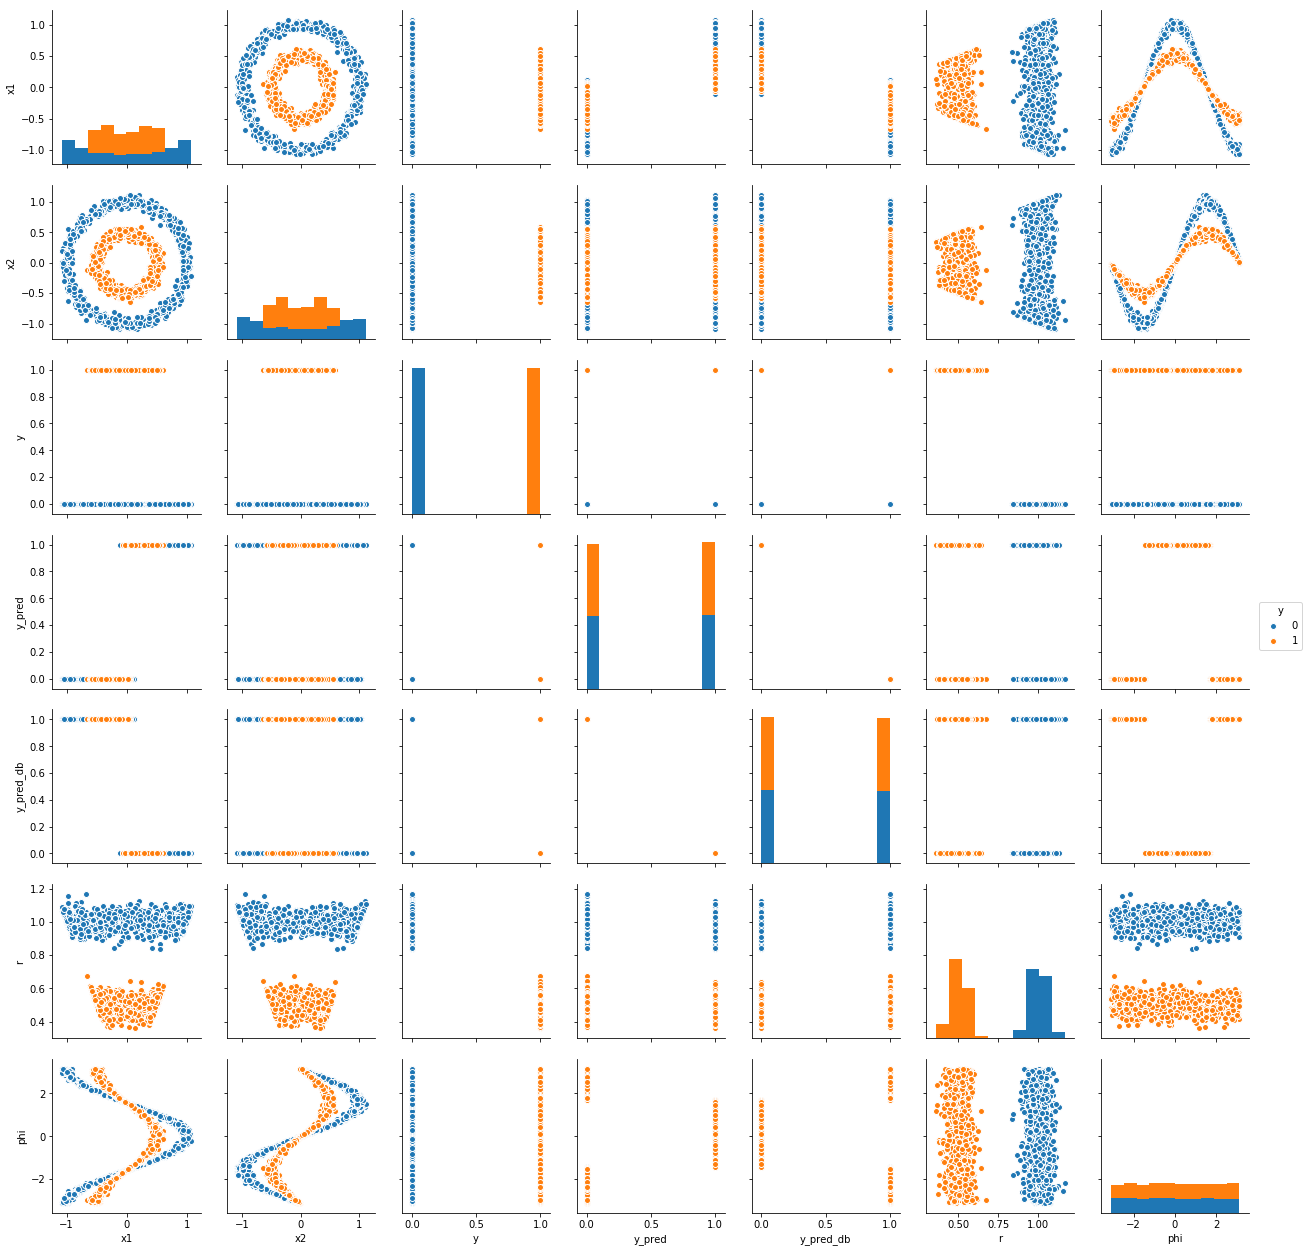

In [277]:
sns.pairplot(df_circles, hue='y')

#### Get best number of clusters

In [38]:
eukl_score = []
eukl_clusters = []
for n_clusters in range(2,20):
    kmeans = KMeans(n_clusters=n_clusters)
    df_circles['y_pred'] = kmeans.fit_predict(df_circles[['x1', 'x2']])
    score = silhouette_score(df_circles[['x1', 'x2']], df_circles['y_pred'])
    eukl_score.append(score)
    eukl_clusters.append(n_clusters)

Text(0,0.5,'silhouette score')

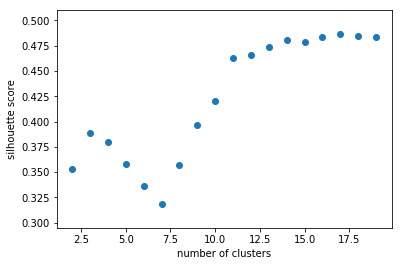

In [39]:
plt.scatter(eukl_clusters, eukl_score)
plt.xlabel('number of clusters')
plt.ylabel('silhouette score')

In [54]:
# scale polar coords
scaler = StandardScaler()
X_polar_scaled = scaler.fit_transform(df_circles[['r', 'phi']])
r_scaled = X_polar_scaled[:,0]
phi_scaled = X_polar_scaled[:,1]
df_circles['r_scaled'] = r_scaled
df_circles['phi_scaled'] = phi_scaled

In [56]:
# polar
polar_score = []
polar_clusters = []
for n_clusters in range(2,10):
    kmeans = KMeans(n_clusters=n_clusters)
    df_circles['y_pred'] = kmeans.fit_predict(df_circles[['r_scaled', 'phi_scaled']])
    score = silhouette_score(df_circles[['r_scaled', 'phi_scaled']], df_circles['y_pred'])
    #polar_kmeans.append((n_clusters, score))
    polar_score.append(score)
    polar_clusters.append(n_clusters)
    #print('n_cluster: {}, score: {}'.format(n_clusters, score))

Text(0,0.5,'silhouette score')

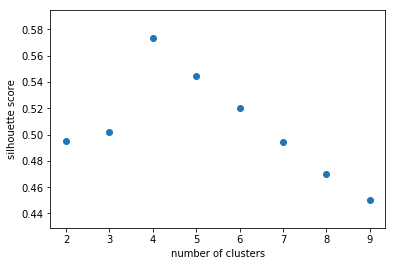

In [57]:
plt.scatter(polar_clusters, polar_score)
plt.xlabel('number of clusters')
plt.ylabel('silhouette score')

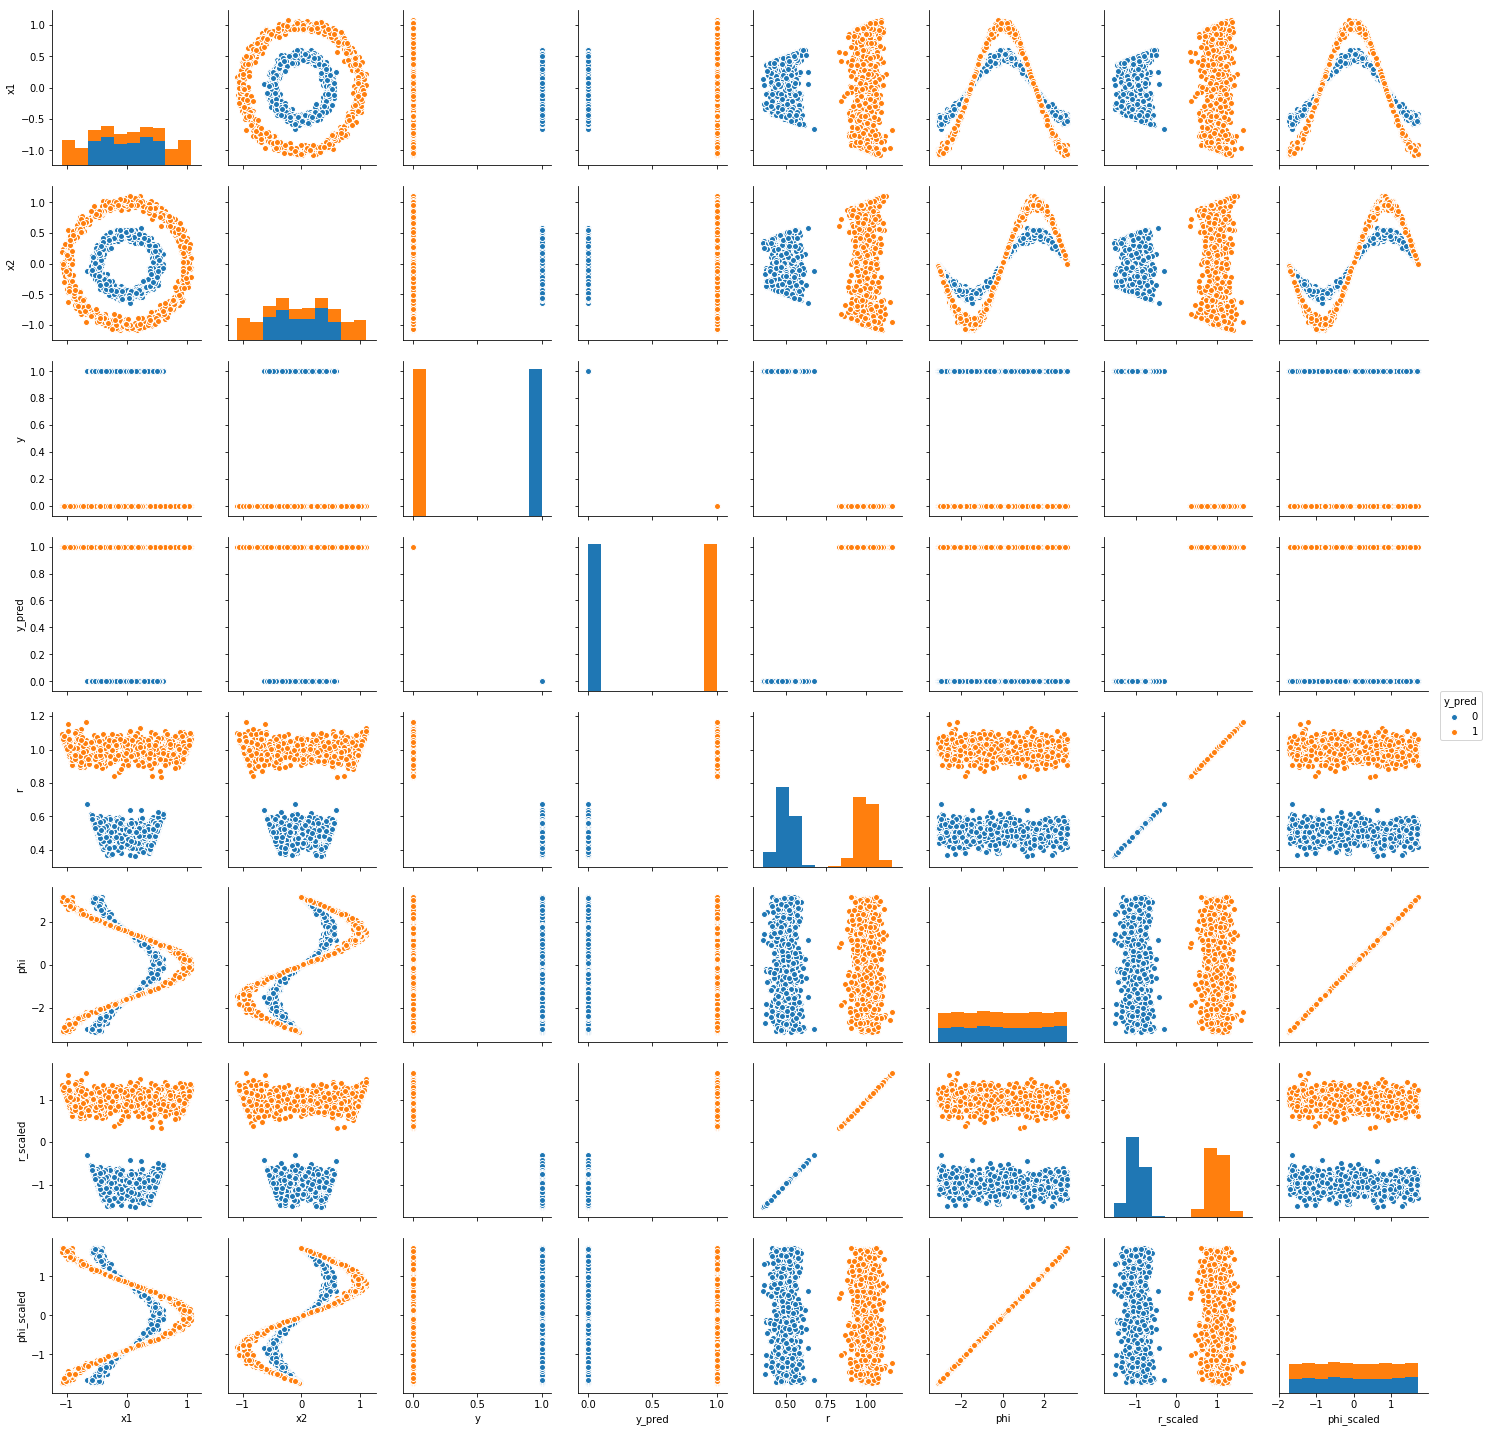

In [58]:
kmeans = KMeans(n_clusters=2)
df_circles['y_pred'] = kmeans.fit_predict(df_circles[['r_scaled', 'phi_scaled']])
sns.pairplot(df_circles, hue='y_pred')

### PCA

In [61]:
# scale polar coords
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_circles[['x1', 'x2']])
x1_scaled = X_scaled[:,0]
x2_scaled = X_scaled[:,1]
df_circles['x1_scaled'] = x1_scaled
df_circles['x2_scaled'] = x2_scaled

In [62]:
pca = PCA()
X_pca = pca.fit_transform(df_circles[['x1_scaled', 'x2_scaled']])
x1_scaled = X_scaled[:,0]
x2_scaled = X_scaled[:,1]
df_circles['x1_pca'] = x1_scaled
df_circles['x2_pca'] = x2_scaled

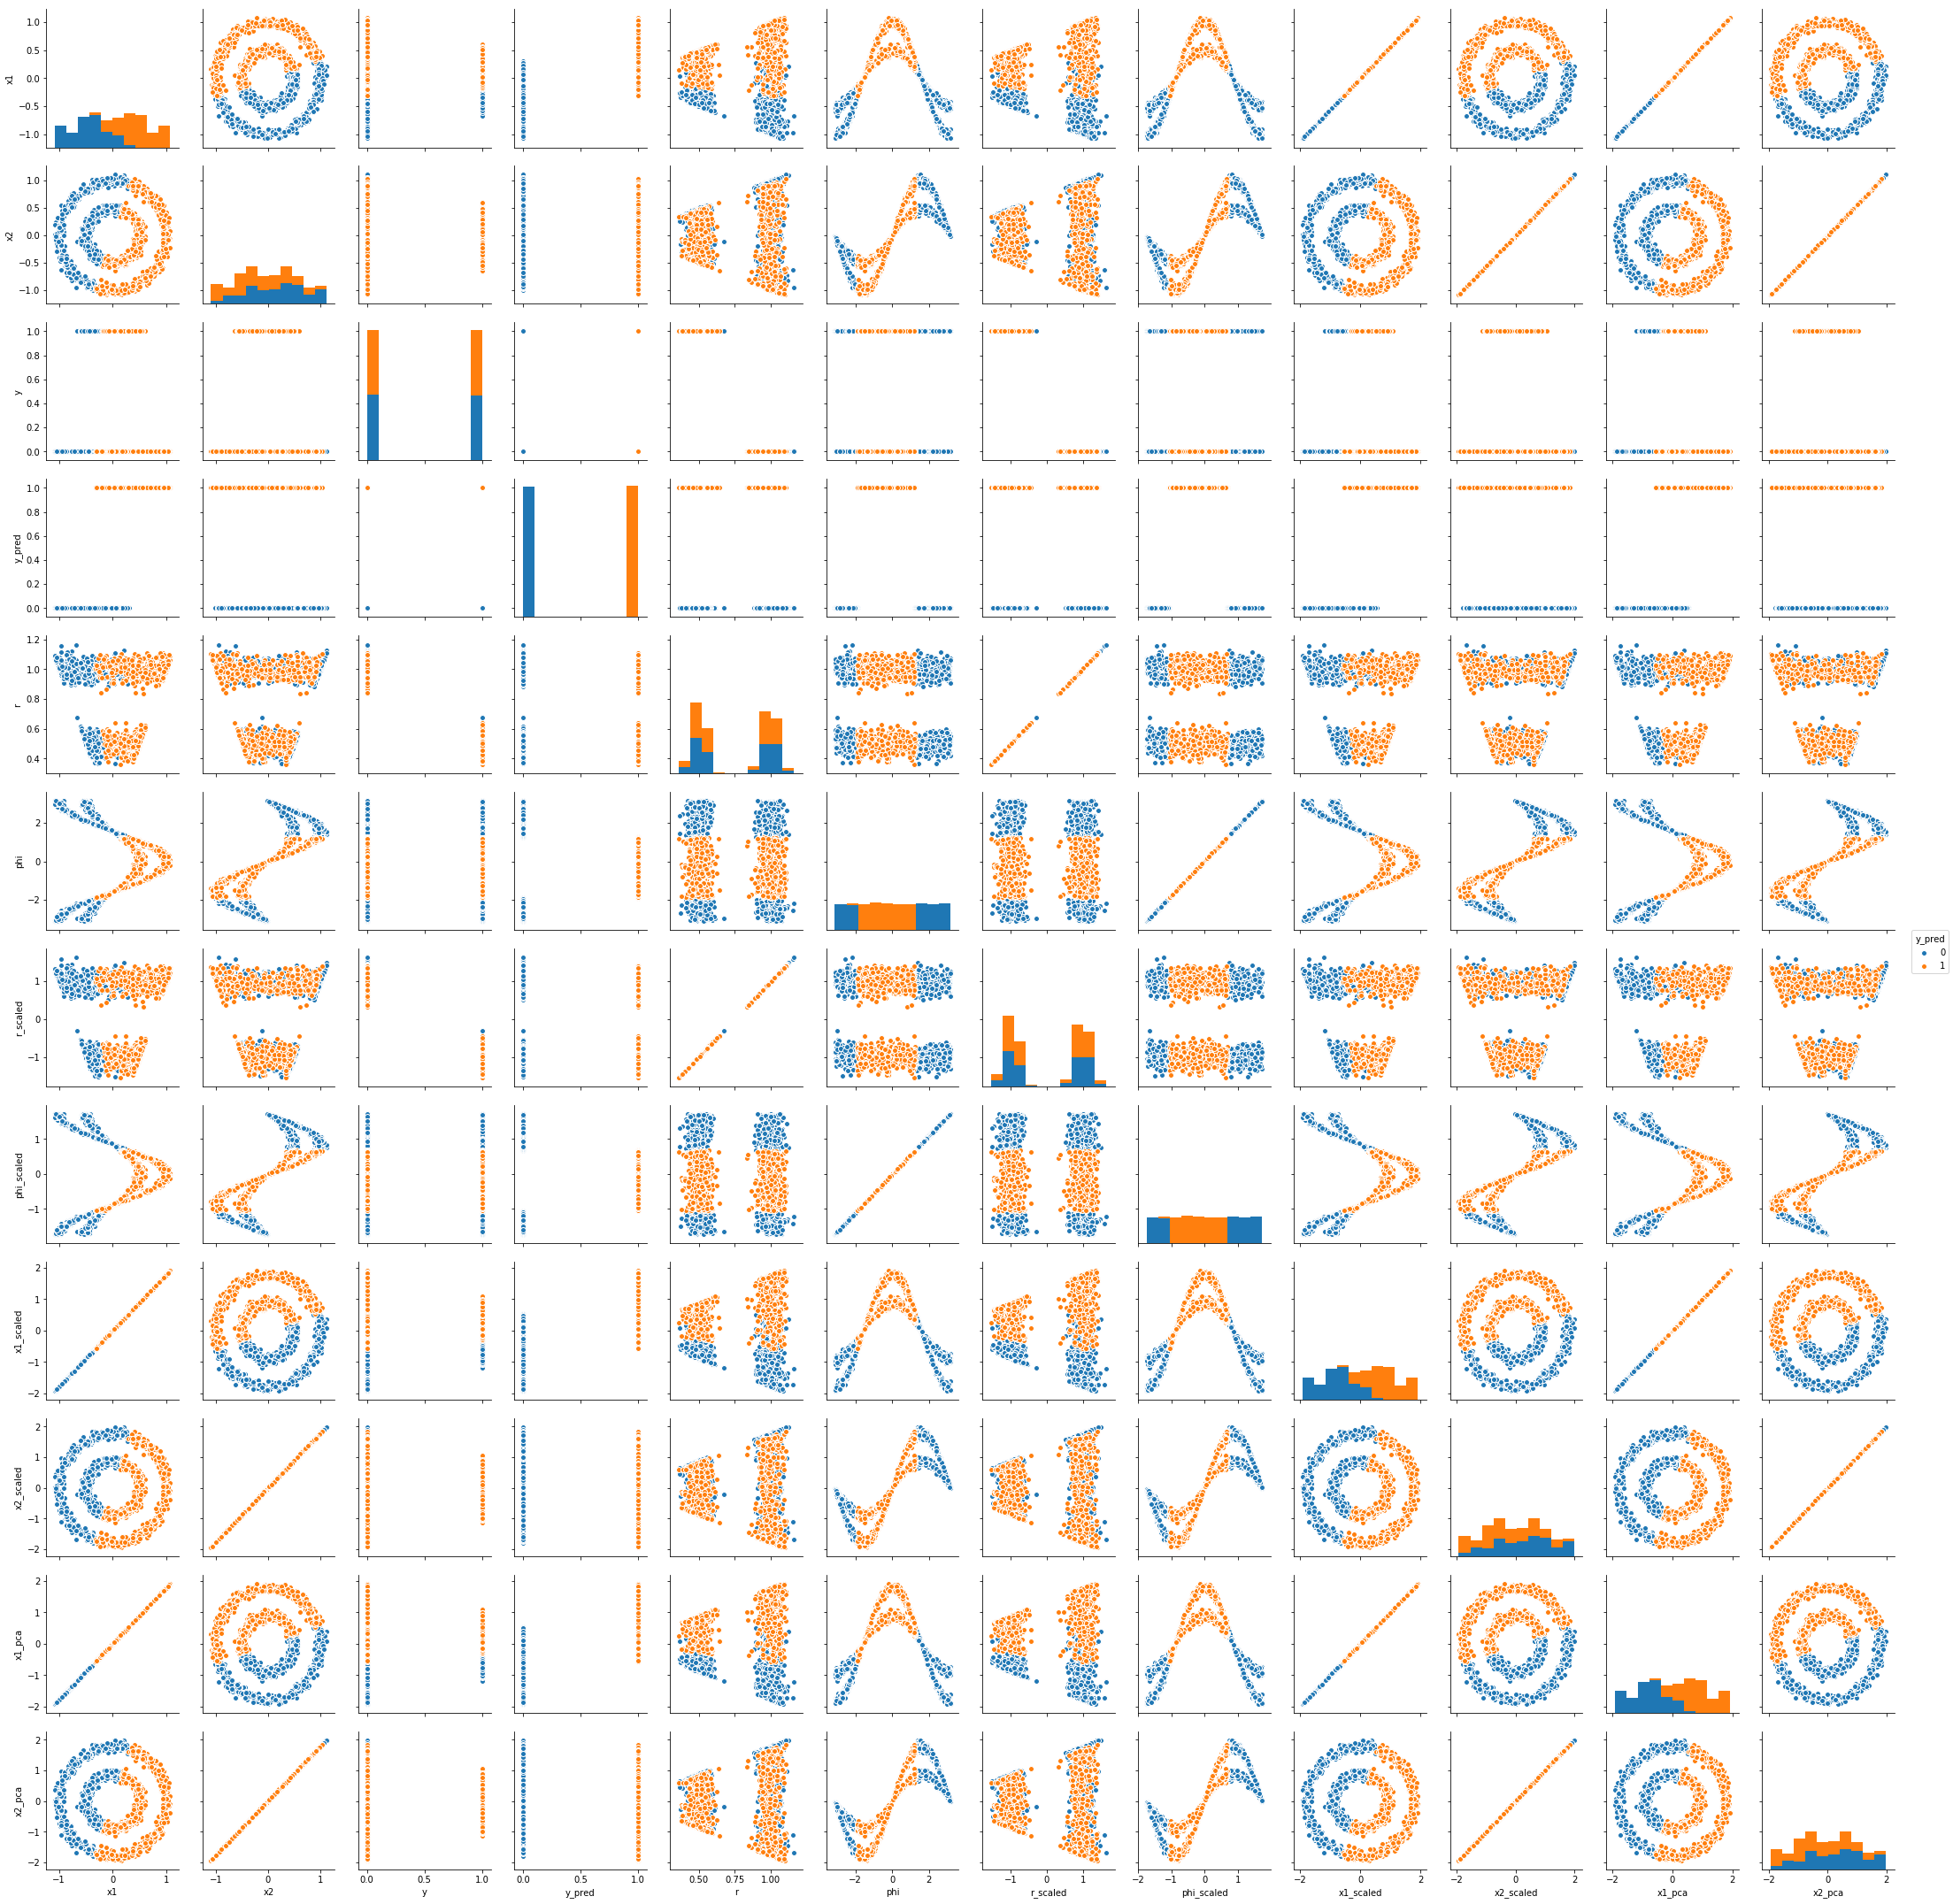

In [64]:
kmeans = KMeans(n_clusters=2)
df_circles['y_pred'] = kmeans.fit_predict(df_circles[['x1_pca', 'x2_pca']])
sns.pairplot(df_circles, hue='y_pred')

### DBSCAN

In [ ]:
# eps scannen und andere hyperparameter
dbscan = DBSCAN()
df_circles['y_pred'] = dbscan.fit_predict(df_circles.drop('y', axis=1))
sns.pairplot(df_circles, hue='y_pred')

In [73]:
db_score = []
db_eps = []
for epsilon in np.arange(0.2,1, 0.2):
    dbscan = DBSCAN(eps=epsilon)
    df_circles['y_pred'] = dbscan.fit_predict(df_circles[['x1_scaled', 'x2_scaled']])
    try:
        score = silhouette_score(df_circles[['x1_scaled', 'x2_scaled']], df_circles['y_pred'])
    except:
        score = 0
    db_score.append(score)
    db_eps.append(epsilon)

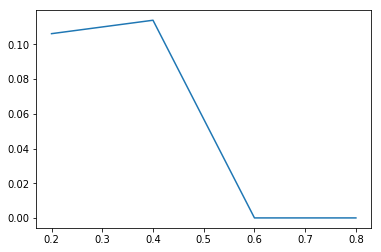

In [74]:
plt.plot(db_eps, db_score)

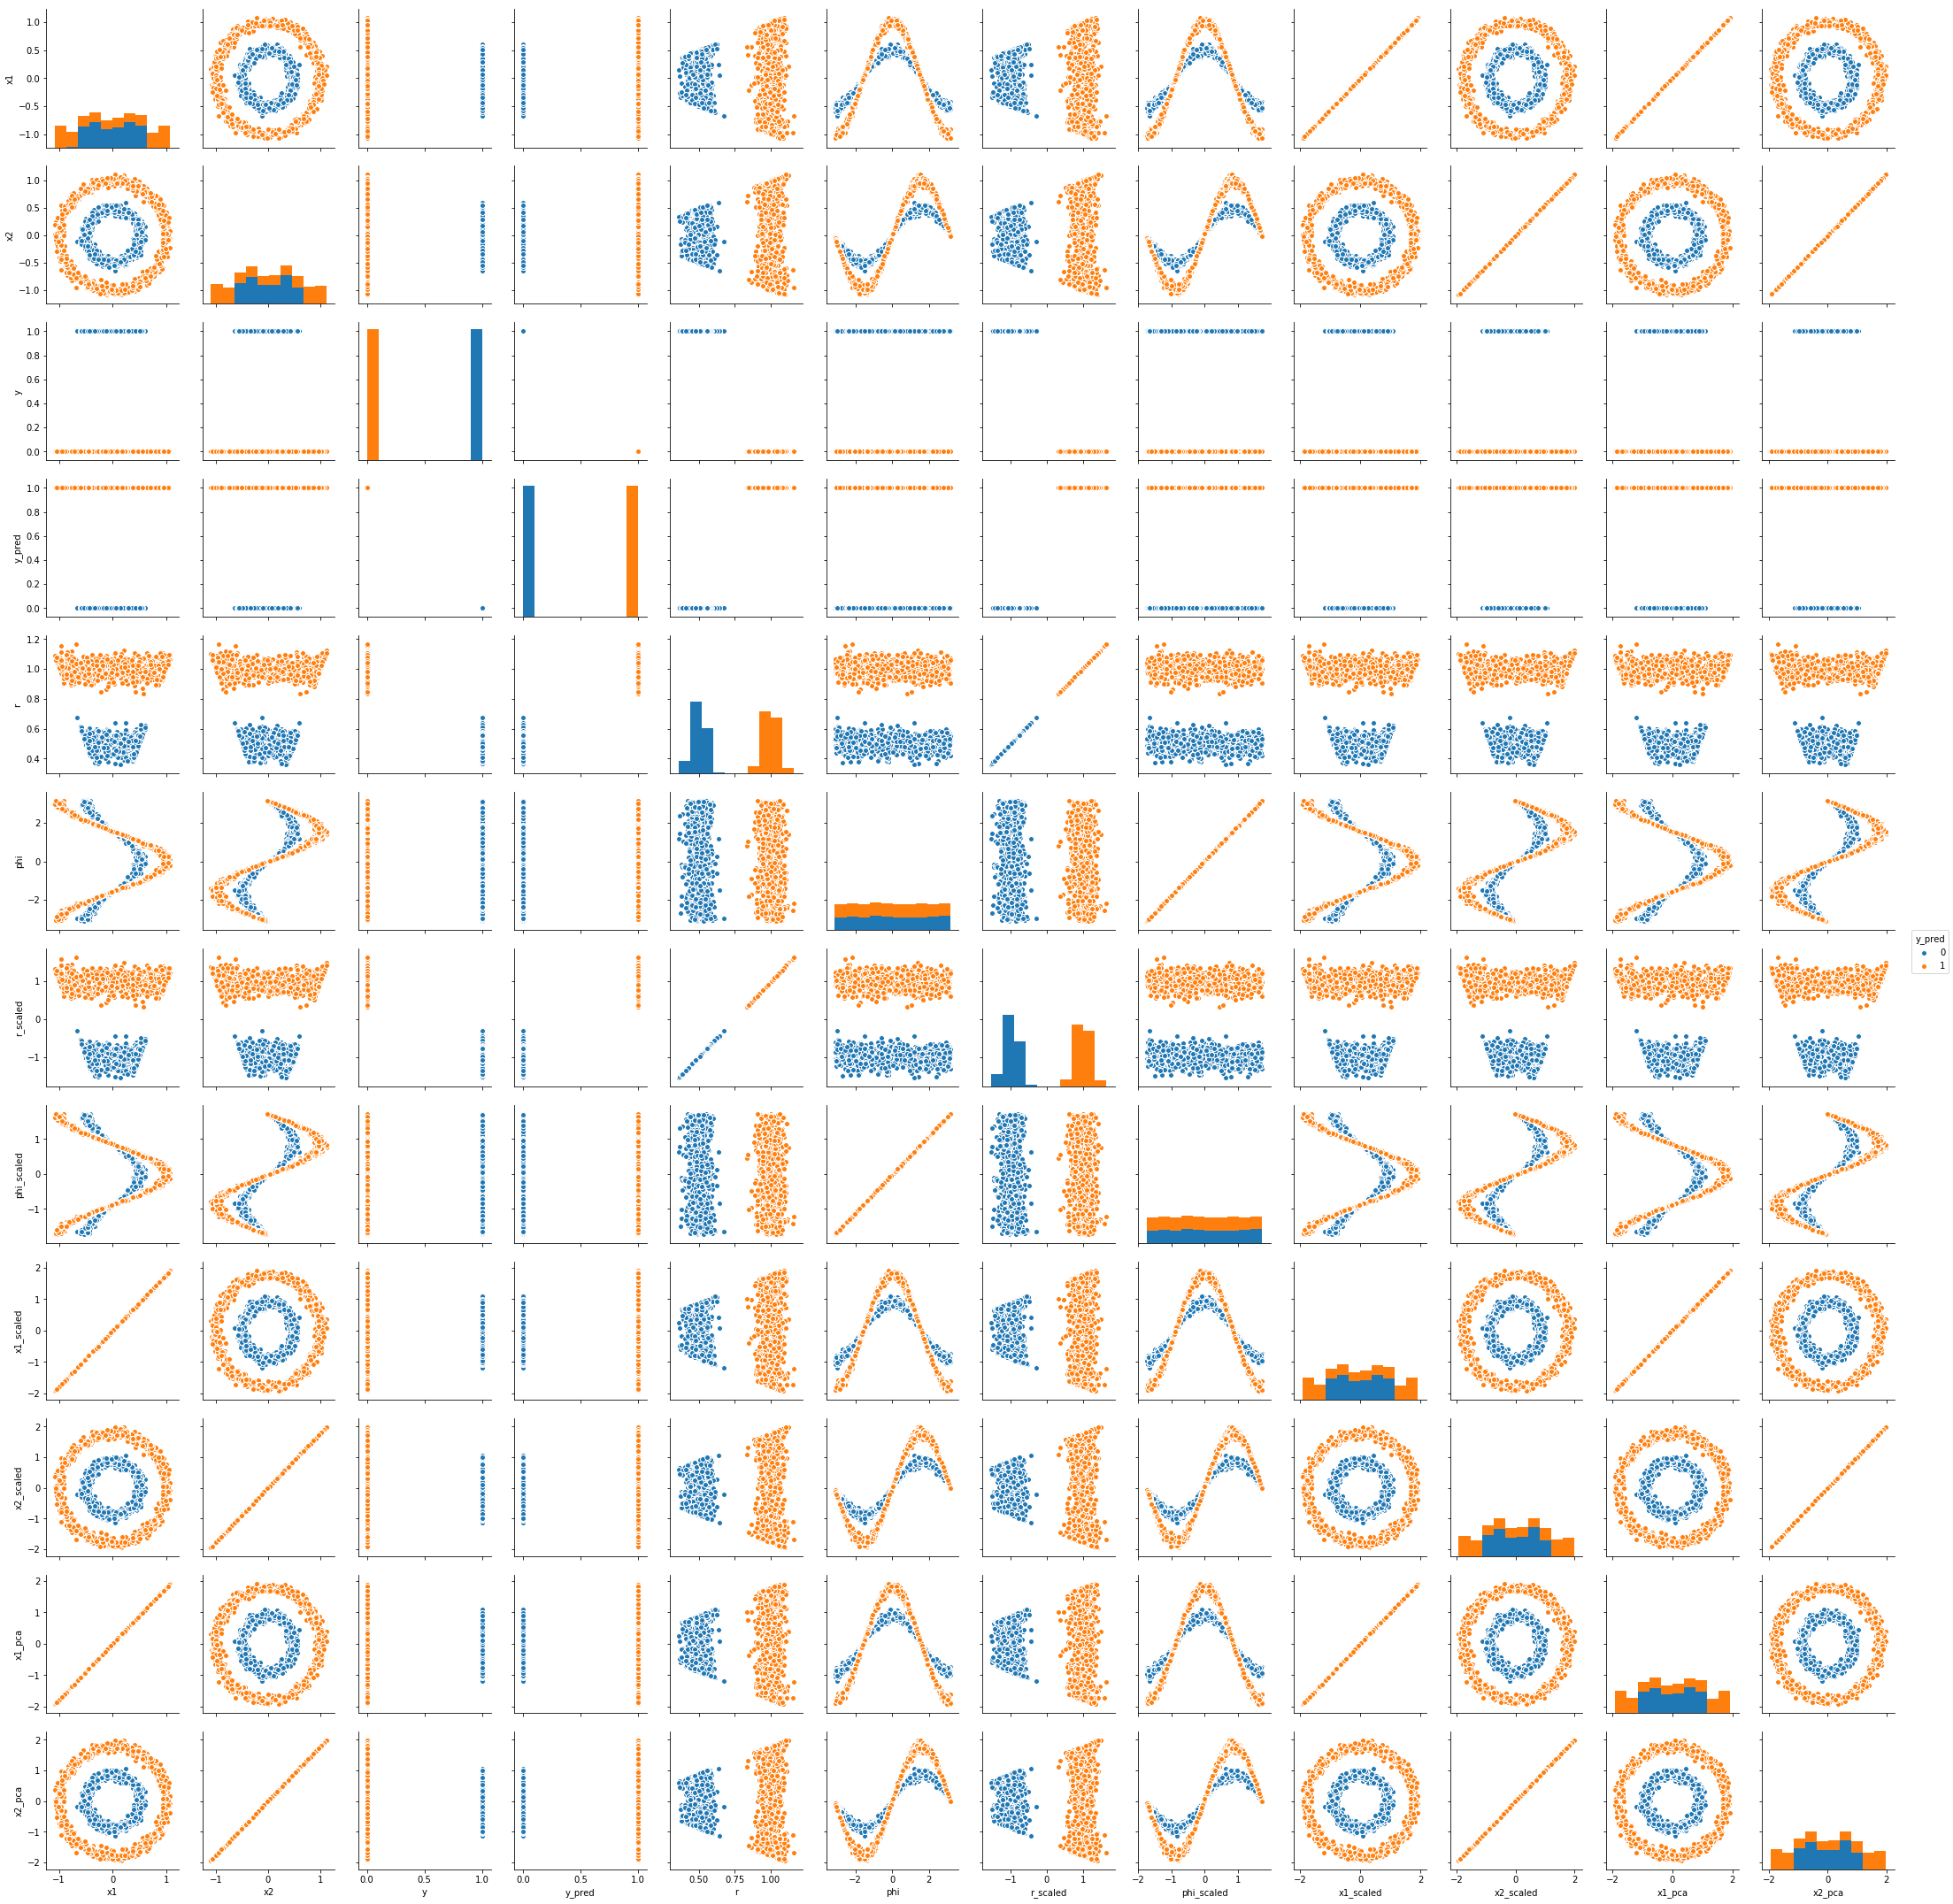

In [75]:
# eps scannen und andere hyperparameter
dbscan = DBSCAN(eps=0.4)
df_circles['y_pred'] = dbscan.fit_predict(df_circles[['x1_scaled', 'x2_scaled']])
#df_circles['y_pred'] = dbscan.fit_predict(df_circles.drop('y', axis=1))
sns.pairplot(df_circles, hue='y_pred')

In [ ]:
# good option would be spectral clustering